In [21]:
import pandas as pd
df=pd.read_csv('./dataset/train.csv')

데이터 정보 확인

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   114 non-null    int64  
 1   Species              114 non-null    object 
 2   Island               114 non-null    object 
 3   Clutch Completion    114 non-null    object 
 4   Culmen Length (mm)   114 non-null    float64
 5   Culmen Depth (mm)    114 non-null    float64
 6   Flipper Length (mm)  114 non-null    int64  
 7   Sex                  111 non-null    object 
 8   Delta 15 N (o/oo)    111 non-null    float64
 9   Delta 13 C (o/oo)    111 non-null    float64
 10  Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ KB


정확한 데이터만을 모델에게 학습시키겠다 => 결측치는 그냥 제거

Feature engineering: 무엇을 학습시킬 것인가?

-----------------------------------------------------------------------------------

1단계: numerical data중 어느것을 활용할 것인가?

1-1. numerical data 컬럼만 따로 조회

In [23]:
df2=df[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Body Mass (g)']]
df2

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,50.0,15.3,220,8.30515,-25.19017,5550
1,49.5,19.0,200,9.63074,-24.34684,3800
2,45.1,14.4,210,8.51951,-27.01854,4400
3,44.5,14.7,214,8.20106,-26.16524,4850
4,49.6,16.0,225,8.38324,-26.84272,5700
...,...,...,...,...,...,...
109,36.6,17.8,185,NaN,NaN,3700
110,39.2,18.6,190,9.11006,-25.79549,4250
111,43.2,18.5,192,8.97025,-26.03679,4100
112,46.9,16.6,192,9.80589,-24.73735,2700


1-2: 상관계수 확인
 => 전부 활용이 가능한 것으로 나옴(모두 강력한 상관관계)

In [24]:
df2.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
Culmen Length (mm),1.000000,-0.251255,0.672205,-0.040205,0.114983,0.572063
Culmen Depth (mm),-0.251255,1.000000,-0.603341,0.650629,0.477688,-0.490643
Flipper Length (mm),0.672205,-0.603341,1.000000,-0.533212,-0.454315,0.864814
Delta 15 N (o/oo),-0.040205,0.650629,-0.533212,1.000000,0.641107,-0.548678
Delta 13 C (o/oo),0.114983,0.477688,-0.454315,0.641107,1.000000,-0.468425
Body Mass (g),0.572063,-0.490643,0.864814,-0.548678,-0.468425,1.000000


1-3. 우선 학습시켜 보고 성능을 확인해본다

In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
df2=df2.dropna(axis=0)
df2.corr()
feature=df2[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
target=df2[['Body Mass (g)']]
model.fit(feature,target)
model.score(feature,target)

0.7907883607445672

1-4: 평균 절대 오차도 확인해본다
    (저는 직관적으로 판단할 때 평균 절대 오차를 활용합니다)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=30)
model2=LinearRegression()
model2.fit(x_train,y_train)
result = model2.predict(x_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, result)


235.21922316012774

In [27]:
print("max:",int(y_test.max()),"min:",int(y_test.min()))

max: 5800 min: 3300


    => 성능이 아주 나빠보이지는 않음

numerical 데이터들을 시각적으로 표현해 확인할 필요가 있음

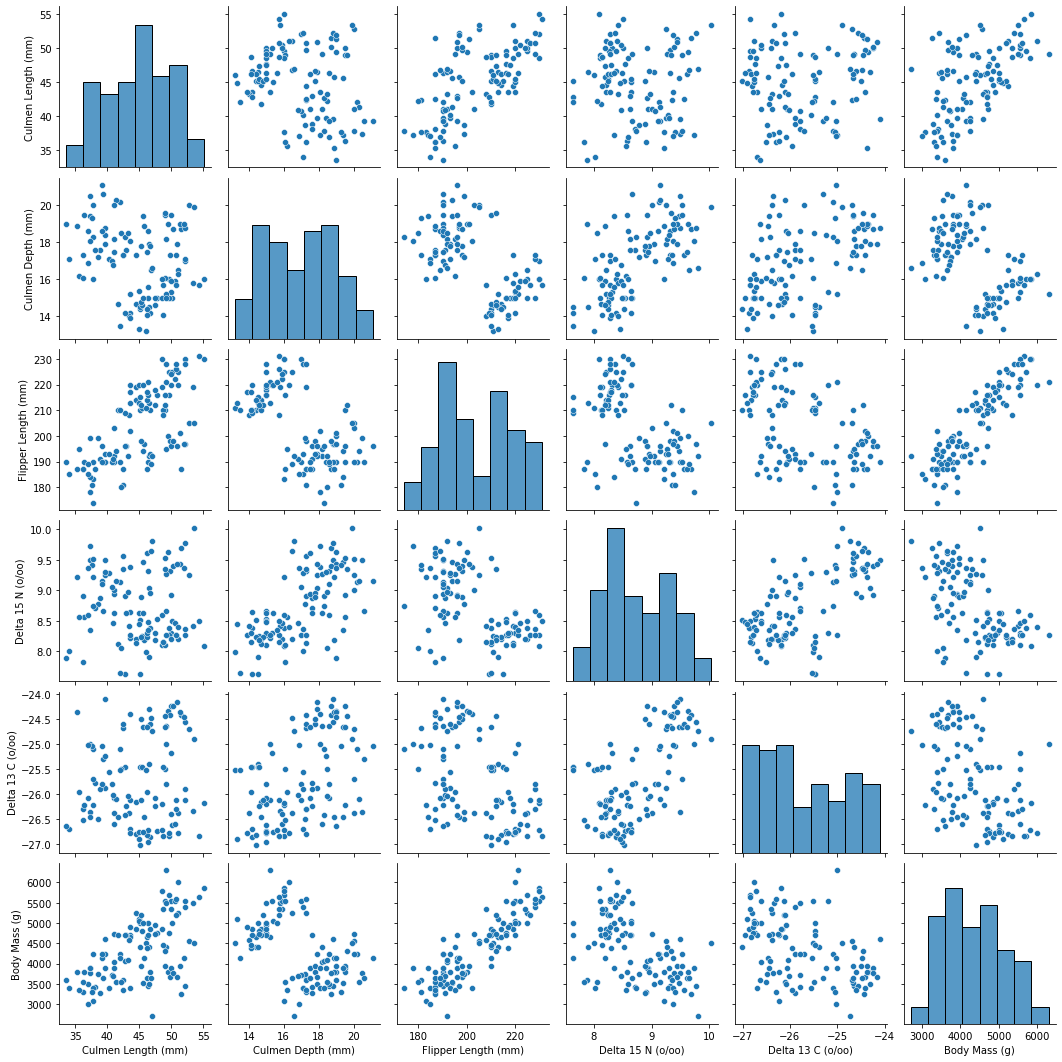

In [28]:
import seaborn as sns
sns.pairplot(df2)

X축을 해당 feature로 두고 Y축을 target으로 두었을 때 모두 깔끔하게 우상향 혹은 우하향을 보여줌

--------------------------------------------------------------------------------------------------------------------

2단계: categorical data중 어느 것을 활용할 것인가?

2-1: 카테고리 확인

In [29]:
df

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
...,...,...,...,...,...,...,...,...,...,...,...
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700
110,110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.11006,-25.79549,4250
111,111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.97025,-26.03679,4100
112,112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700


2-2: Clutch Completion을 어떻게 처리할 것인가?

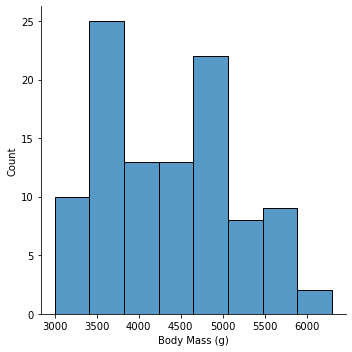

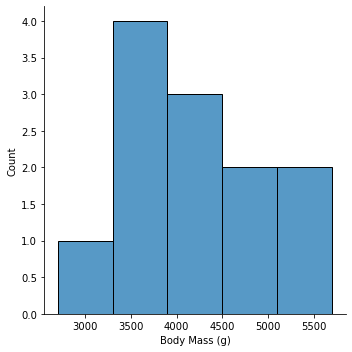

In [20]:
import seaborn as sns
tmp=df[df['Clutch Completion']=='Yes']
ax=sns.displot(tmp['Body Mass (g)'])
tmp=df[df['Clutch Completion']=='No']
ax=sns.displot(tmp['Body Mass (g)'])

해석: 얼핏 비슷해 보이나, x축의 범주에 집중해보자. YES인 경우는 좀 더 큰 값을 많이 가질 수 있는 반면, NO인 경우 YES에 비해 가질 수 있는 값에 한계가 존재하고 상대적으로 작은 값들을 가지게 된다.

Yes일때 더 큰 값을 가질 수 있으므로 Clutch Completion의 경우 Yes를 1로, No를 0으로 두는 전략 채택

2-3: 성별은 어떻게 활용할 것인가?

<AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Body Mass (g)'>

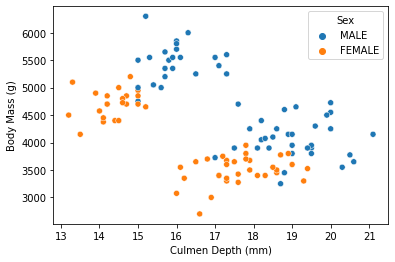

In [ ]:
sns.scatterplot(x='Culmen Depth (mm)',y='Body Mass (g)',hue='Sex',data=df)

산점도를 위해 임의로 X축을 설정했으 뿐이라 X축에 의미를 두진 않았습니다. 무언가 군집화되어있는 느낌이 있는데, 군집 내에서는 수컷이 암컷보다 몸무게가 더 높다는 것을 확인할 수 있음. 혹시 저 군집이 종의 차이가 아닐까 하는생각이 들어 종도 같이 고려해서 성별 활용 방안 모색

2-4: 종은 어떠한가?(2-3의 연장선 포함)

<AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Body Mass (g)'>

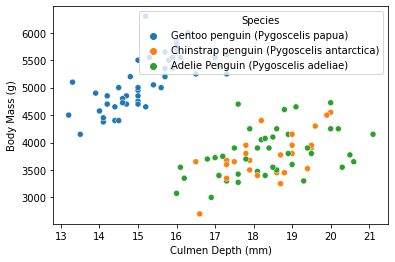

In [ ]:
sns.scatterplot(x='Culmen Depth (mm)',y='Body Mass (g)',hue='Species',data=df)

여기서도 X축이 의미 없습니다(산점도를 위한 수단) 확인할 수 있듯, 팽귄의 종은 총 3종이고 위의 군집은 Gentoo penguin이고 아래 군집은 나머지 팽귄들입니다. one-hot인코딩을 하는 방법이 있지만, 굳이 컬럼 3개로 가져가기 보단, Gentoo penguin인가 아닌가만 0과 1로 구분하게 하는 편이 낫겠다고 생각했습니다. 그리고 군집 내에서 성별에 따른 몸무게 차이가 자명했기에, 수컷을 1로 암컷을 0으로 두는 것이 바람직해 보입니다.

2-5: 섬의 경우 어떠할까...?

<AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Body Mass (g)'>

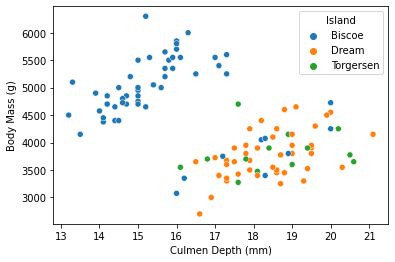

In [ ]:
sns.scatterplot(x='Culmen Depth (mm)',y='Body Mass (g)',hue='Island',data=df)

여기서도 X축은 의미 없습니다. 아래쪽 군집에서 모든 섬이 섞여있군요. 근데 Biscoe의 경우 대부분이 윗 군집에 속해있습니다. 그렇다면 Biscoe인지 아닌지를 판단하는 편이 좋을 수 있겠지만, 같은 X축으로 진행하였기에, Gentoo팽귄이 Biscoe에 살아서 이런 결과가 나왔을것 같네요 아래에서 확인해봅시다.

In [ ]:
df[df['Island']=='Biscoe']

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
5,5,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,51.1,16.5,225,MALE,8.20660,-26.36863,5250
9,9,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.7,15.0,216,FEMALE,8.53018,-26.72751,4750
12,12,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.6,14.2,210,FEMALE,8.38289,-26.86352,4850
13,13,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,43.5,14.2,220,FEMALE,8.64931,-26.68867,4700
14,14,Adelie Penguin (Pygoscelis adeliae),Biscoe,Yes,41.1,18.2,192,MALE,8.62264,-26.60023,4050
15,15,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.1,15.0,225,MALE,8.50153,-26.61414,5000


역시나 Gentoo팽귄이 Biscoe섬에 살고 있었습니다. 그리고 Biscoe섬에는 Gentoo팽귄만 살고있는게 아닌 것이 확인되었습니다. 이 경우 몸무게를 대표하기에 살고있는 섬은 부적절하다고 생각했습니다. 몸무게 차이가 있는 두 종이 같은 섬에 살고 있어 모델에 혼란을 야기할 수 있다고 판단했습니다

요약: Gentoo팽귄인지 아닌지, Clutch Completion가 Yes인지 아닌지, 수컷인지 아닌지를 feature에 포함하고, target을 제외한 모든 numerical변수는 feature에 포함

-----------------------------------------------

3단계: 데이터 전처리 및 예측

test dataset 조회

In [31]:
test_set=pd.read_csv('./dataset/test.csv')
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   228 non-null    int64  
 1   Species              228 non-null    object 
 2   Island               228 non-null    object 
 3   Clutch Completion    228 non-null    object 
 4   Culmen Length (mm)   228 non-null    float64
 5   Culmen Depth (mm)    228 non-null    float64
 6   Flipper Length (mm)  228 non-null    float64
 7   Sex                  222 non-null    object 
 8   Delta 15 N (o/oo)    219 non-null    float64
 9   Delta 13 C (o/oo)    220 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 17.9+ KB


결측치 행만 조회

In [37]:
test_set[test_set.isna().any(axis=1)]

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
27,27,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,38.6,21.2,191.0,MALE,NaN,NaN
46,46,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.1,186.0,NaN,8.63243,-25.21315
75,75,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,51.9,19.5,206.0,MALE,NaN,-23.78767
81,81,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,37.5,18.9,179.0,NaN,NaN,NaN
98,98,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,13.8,216.0,NaN,8.25818,-26.23886
106,106,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,15.3,222.0,MALE,NaN,NaN
152,152,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,15.7,217.0,NaN,8.04111,-26.18444
159,159,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,41.1,17.6,182.0,FEMALE,NaN,NaN
175,175,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,40.8,18.4,195.0,MALE,NaN,NaN
202,202,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,MALE,NaN,NaN


성별, Delta 15 N (o/oo), Delta 13 C (o/oo)에 결측치가 있음을 확인. => 결측치는 예측해서 처리

성별은 0과 1이므로 이진분류(로지스틱 회귀), 나머지는 선형회귀로 예측

아래는 결과 모델에 학습시킬 형식을 만들기 위한 전저리 관련 코드

In [33]:
def spe(s):
    if s=='Gentoo penguin (Pygoscelis papua)': return 1
    else: return 0
def gender(s):
    if s=='MALE':return 1
    else: return 0
def C(s):
    if s=='Yes':return 1
    else: return 0
def preprocessing(df,two=True):
    df=df.dropna(axis=0)
    sp=df[['Species']]
    cc=df[['Clutch Completion']]
    s=df[['Sex']]
    tmp=df[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
    if two==True: Y=df[['Body Mass (g)']]
    else: Y=None
    sp=sp.applymap(spe)
    cc=cc.applymap(C)
    s=s.applymap(gender)
    X=pd.concat([sp,cc,s,tmp],axis=1)
    return X,Y

전처리 후 상관관계 확인

In [34]:
training_set=pd.read_csv('./dataset/train.csv')
tmp1,tmp2=preprocessing(training_set)
training_set=pd.concat([tmp1,tmp2],axis=1)
training_set.corr()

,Species,Clutch Completion,Sex,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
Species,1.000000,0.168701,0.010538,0.465207,-0.821747,0.878505,-0.708336,-0.548916,0.826629
Clutch Completion,0.168701,1.000000,-0.088302,-0.143089,-0.199572,0.082637,-0.279225,-0.292715,0.113939
Sex,0.010538,-0.088302,1.000000,0.325886,0.369158,0.257105,0.136194,-0.099384,0.414544
Culmen Length (mm),0.465207,-0.143089,0.325886,1.000000,-0.229883,0.663455,-0.034945,0.123027,0.568203
Culmen Depth (mm),-0.821747,-0.199572,0.369158,-0.229883,1.000000,-0.590278,0.646565,0.465503,-0.498272
Flipper Length (mm),0.878505,0.082637,0.257105,0.663455,-0.590278,1.000000,-0.527933,-0.447023,0.878938
Delta 15 N (o/oo),-0.708336,-0.279225,0.136194,-0.034945,0.646565,-0.527933,1.000000,0.636223,-0.548355
Delta 13 C (o/oo),-0.548916,-0.292715,-0.099384,0.123027,0.465503,-0.447023,0.636223,1.000000,-0.468042
Body Mass (g),0.826629,0.113939,0.414544,0.568203,-0.498272,0.878938,-0.548355,-0.468042,1.000000


주의할점: test set에는 몸무게 컬럼이 없고 Delta 15 N (o/oo), Delta 13 C (o/oo)가 누락된 경우가 많고 반드시 다같이 없는 것이 아님!!!

즉, Body Mass (g), Delta 15 N (o/oo), Delta 13 C (o/oo), Sex는 test_set결측치 처리 feature에서 제외되는 편이 간결함.

성별 예측 feature= [Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm)]

Delta 15 N (o/oo), Delta 13 C (o/oo)예측 feature= [Species, Clutch Completion, Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm)]

결측치 처리를 위한 전처리 코드

In [39]:
import pandas as pd

def preprocessing2(df,two=True):
    df=df.dropna(axis=0)
    sp=df[['Species']]
    cc=df[['Clutch Completion']]
    tmp=df[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)']]
    if two==True: Y=df[['Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
    else: Y=None
    sp=pd.get_dummies(sp)
    sp=sp[['Species_Chinstrap penguin (Pygoscelis antarctica)','Species_Gentoo penguin (Pygoscelis papua)']]
    cc=cc.applymap(C)
    X=pd.concat([sp,cc,tmp],axis=1)
    if two==True: return X,Y[['Delta 15 N (o/oo)']],Y[['Delta 13 C (o/oo)']]
    else: return X

def preprocessing3(df,two=True):
    sp=df[['Species']]
    cc=df[['Clutch Completion']]
    tmp=df[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)']]
    if two==True: Y=df[['Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
    else: Y=None
    sp=pd.get_dummies(sp)
    sp=sp[['Species_Chinstrap penguin (Pygoscelis antarctica)','Species_Gentoo penguin (Pygoscelis papua)']]
    cc=cc.applymap(C)
    X=pd.concat([sp,cc,tmp],axis=1)
    if two==True: return X,Y[['Delta 15 N (o/oo)']],Y[['Delta 13 C (o/oo)']]
    else: return X

def Ggender(s):
    if s=='MALE':return 1
    elif s=='FEMALE': return 0
    else: return np.nan

def preprocessing4(df):
    sp=df[['Species']]
    cc=df[['Clutch Completion']]
    s=df[['Sex']]
    tmp=df[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
    sp=sp.applymap(spe)
    cc=cc.applymap(C)
    s=s.applymap(Ggender)
    X=pd.concat([sp,cc,s,tmp],axis=1)
    return X



결측치 처리 코드

In [49]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import sys
train=pd.read_csv('./dataset/train.csv')
train,y=preprocessing(train,False)
s_feature=train[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)']]
s_target=train[['Sex']]
#xs_train,xs_test,ys_train,ys_test=train_test_split(s_feature,s_target,test_size=0.3,random_state=30)
model_for_sex=LogisticRegression()
model_for_sex.fit(s_feature,s_target)
model_for_15=LinearRegression()
model_for_13=LinearRegression()
train=pd.read_csv('./dataset/train.csv')
ffff=['Species_Chinstrap penguin (Pygoscelis antarctica)','Species_Gentoo penguin (Pygoscelis papua)']+['Clutch Completion']+['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)']


train=pd.read_csv('./dataset/train.csv')
cfeature,target1,target2=preprocessing2(train)
model_for_15.fit(cfeature,target1)
model_for_13.fit(cfeature,target2)
test=pd.read_csv('./dataset/test.csv')
tmp1=preprocessing3(test,False)
test=preprocessing4(test)
test=test.fillna(sys.maxsize)
for i in range(0,len(test)):
    if test.iloc[i,2]==sys.maxsize:
        test.iloc[i,2]=model_for_sex.predict(pd.DataFrame(tmp1.iloc[i,3:6].to_numpy()).transpose())
    if test.iloc[i,6]==sys.maxsize:
        test.iloc[i,6]=model_for_15.predict(pd.DataFrame(tmp1.iloc[i].to_numpy()).transpose())[0]
    if test.iloc[i,7]==sys.maxsize:
        test.iloc[i,7]=model_for_13.predict(pd.DataFrame(tmp1.iloc[i].to_numpy()).transpose())[0]

C:\Users\niade\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


결과를 위한 모델 학습

In [50]:
model_for_result=LinearRegression()
training_set=pd.read_csv('./dataset/train.csv')
X,Y=preprocessing(training_set)
model_for_result.fit(X,Y)
model_for_result.score(X,Y)

0.8706613290461682

결과 예측 및 저장

In [54]:
result=model_for_result.predict(test)
result=pd.DataFrame(result)
result.columns=['Body Mass (g)']
result

,Body Mass (g)
0,4393.858814
1,5568.251709
2,3574.830758
3,3393.610335
4,3238.980279
...,...
223,4178.718788
224,4740.940120
225,4714.594245
226,4146.251008


In [55]:
result.to_csv('./submit.csv')

최종 점수: 262.22454